## [0] Hysteresis
### Think of a biological, social or physical system that might exhibit hysteresis (perhaps something that we don't find in a typical text book... license to be creative here!). Briefly describe how it might work. Discuss any feedback(s). What is the state variable exhibiting bi-stability and what is/are the variables controlling it (i.e., 'tuning parameters')? A diagram may help.

Consider a closed system with N individuals a variable amount of food/resources. Suppose these individuals are facultative social foragers that move in groups when there is a limited amount of food. For a given amount of food (F), most of the individuals (say n) move in groups and a few (say m) are loners. When the amount of food available in this system increases slowly, n decreases slowly at first and then rapidly until m=N. Now when the amount of food in the system becomes patchy and is decreased, n increases very slowly at first and then more rapidly until n=N. This social behavior perhaps takes "longer" to recover because this behavior is learned from other individuals in the system.

## [1] Panic Model
### Code the Panic model, as described in Sayama. Use a square lattice with Moore neighborhoods. 

### 1) Create a function that takes the size of the square lattice, L, (length of one side of the world), the percentage of cells to start off in state 1 (p) and a length of time T to run as parameters and returns the percentage of the world in state 1 after T time steps.

In [22]:



# import 

import numpy as np
import matplotlib.pyplot as plt
import random
import cProfile
from matplotlib import animation
from matplotlib import colors



L = 10 #size
p = 0.1  #proportion
T = 10 #number of time steps


#initializing array with p percentage of panicky individuals 

x = np.empty([L, L])
x.fill(np.nan)
temp = np.random.random(size=(L, L))
for i in range(L):
    for j in range(L):
        if temp[i,j] <= p:
            x[i,j] = 1
        else:
            x[i,j] = 0

    
def panic(x,L,p,T):
    """ function for panic model that returns the percentage of panicky individuals & state of all individuals (array)"""
    x = np.empty([L, L])
    x.fill(np.nan)
    temp = np.random.random(size=(L, L))
    for i in range(L):
        for j in range(L):
            if temp[i,j] <= p:
                x[i,j] = 1
            else:
                x[i,j] = 0
    y = np.zeros([L, L])
    count = 0
    for sims in range(T):
        for i in range(L):
            for j in range(L):
                if i == L-1: 
                    i = -1
                if j == L-1:
                    j = -1
                #counting the number of panicky individuals
                rule = x[i-1,j-1] + x[i+1,j-1] + x[i,j-1] + x[i-1,j] + x[i+1,j] + x[i-1,j+1] + x[i,j+1] + x[i+1,j+1]
                if rule >= 4:
                    y[i,j] = 1
                    if sims == T-1:
                        count = count+1
                        
                else:
                    y[i,j] = 0
        x = y
    #print(y)
    
    
    return(count/(L**2),x)

percentage_after_t = panic(x,L,p,T)[0]
next_world = panic(x,L,p,T)[1]




### 2) Play around with your function to figure out an an appropriate value for to ensure you are getting equilibrium values of T. Justify your value with some figures.


<IPython.core.display.Javascript object>


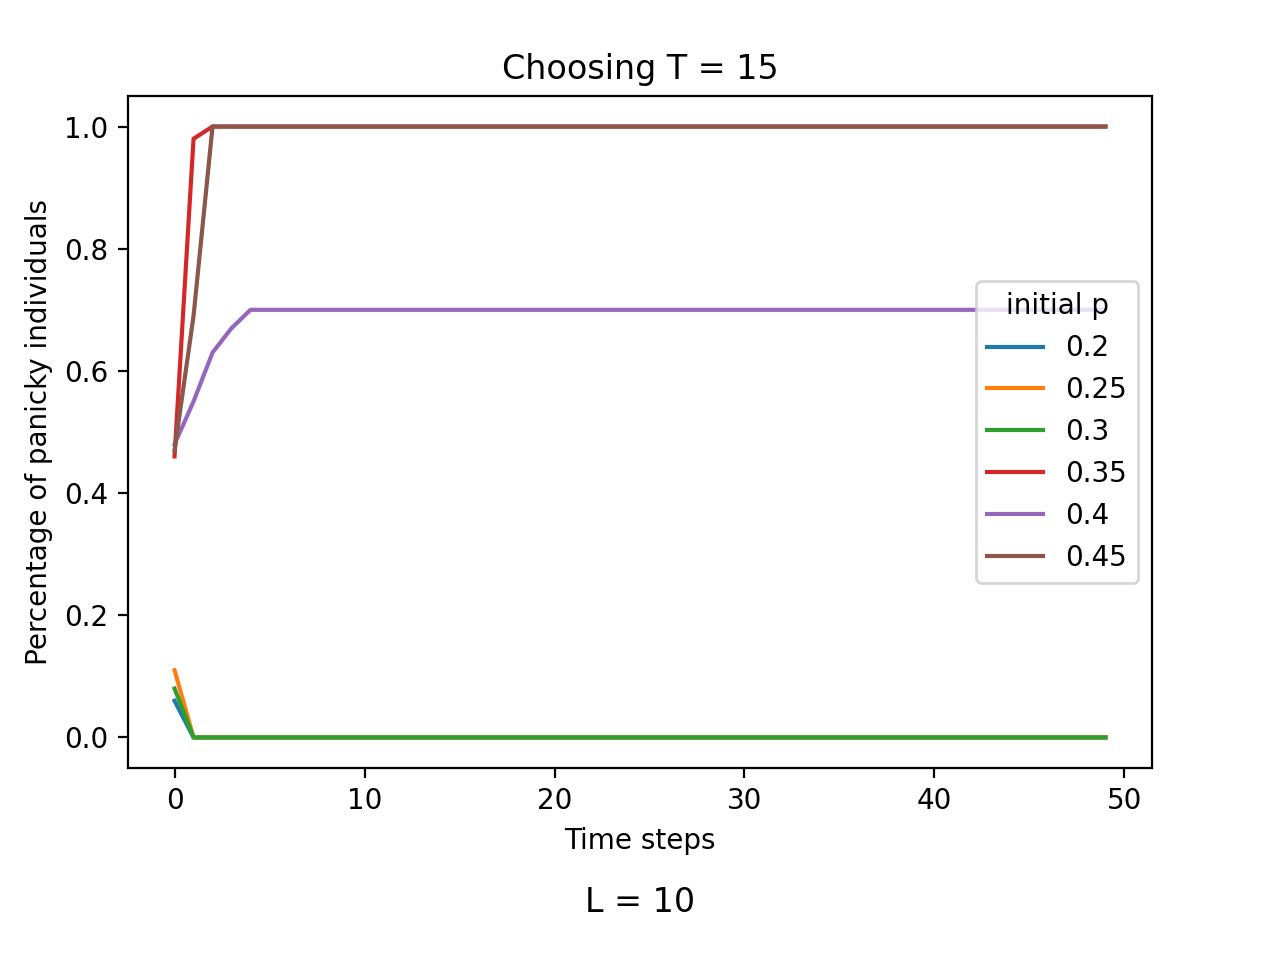

Text(0.5, 0.05, 'L = 10')

In [36]:

# define new function panic_2 so that I can record all the percentages and not the final percentage

def panic_2(x,L,p,T):
    """new function so that I can record percentage at every time step"""
    percentages = np.empty([T, 1])
    percentages.fill(np.nan)
    
    y = np.zeros([L, L])
    
    for sims in range(T):
        if sims == 0:
            x = np.empty([L, L])
            x.fill(np.nan)
            temp = np.random.random(size=(L, L))
            for i in range(L):
                for j in range(L):
                    if temp[i,j] <= p:
                        x[i,j] = 1
                    else:
                        x[i,j] = 0
        count = 0
        for i in range(L):
            for j in range(L):
                if i == L-1:
                    i = -1
                if j == L-1:
                    j = -1
                #counting the number of panicky individuals
                rule = x[i-1,j-1] + x[i+1,j-1] + x[i,j-1] + x[i-1,j] + x[i+1,j] + x[i-1,j+1] + x[i,j+1] + x[i+1,j+1]
                if rule >= 4:
                    y[i,j] = 1
                    count = count+1
                        
                else:
                    y[i,j] = 0
        percentages[sims,0] = count/(L**2)
        x = y
    #print(y)
    
    
    return(percentages)




fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Percentage of panicky individuals')
ax1.set_title('Choosing T = 15')
for i in np.arange(0.2,0.5,0.05):
    plt.plot(range(0,50),panic_2(x,L,round(i,1),50),label = round(i,2))

plt.legend(title = 'initial p')
txt="L = " + str(L) 
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)


### 3) Vary p systematically from 0 to 1 and plot the steady state fraction of cells in state 1 as a function of p.


<IPython.core.display.Javascript object>


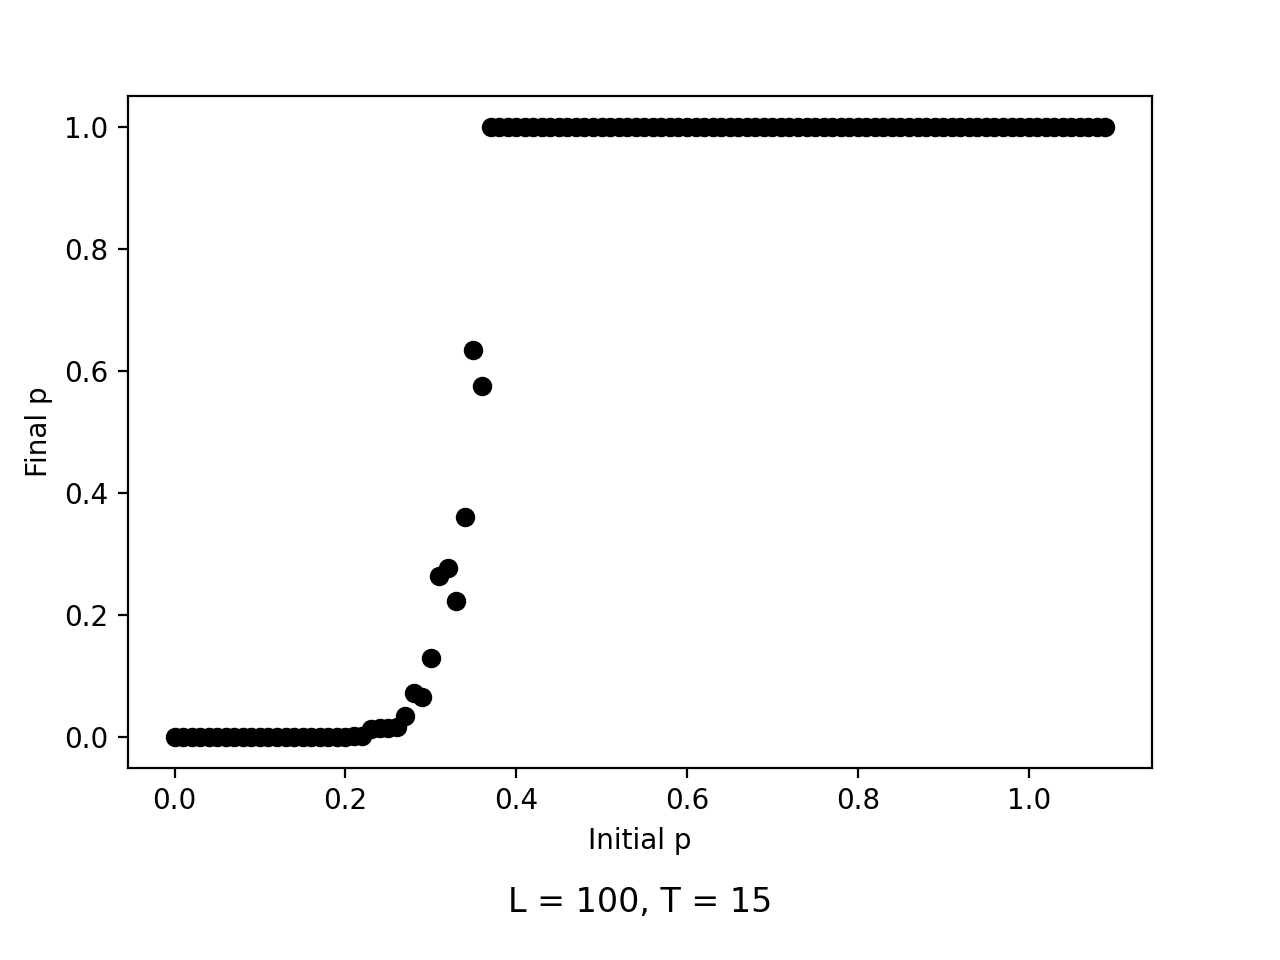

Text(0.5, 0.05, 'L = 100, T = 15')

In [38]:

#use for loop to vary p from 0 to 1\
x = np.empty([L, L])
x.fill(np.nan)
L=100
T=15

fig = plt.figure()

ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#ax = fig.add_subplot(111)

for initial_p in np.arange(0,1.1,0.01):
    plt.scatter(initial_p,panic(x,L,initial_p,T)[0],color = 'black')
ax.set_xlabel('Initial p')
ax.set_ylabel('Final p')
txt="L = " + str(L) + ", T = " + str(T)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)


#call panic function to  give final p 
#plot final p as a function of final p

### 4) Run some additional simulations to estimate ,p_c the value at which a phase transition occurs.

At around p = 0.38 most of the individuals become panicky.

In [5]:


#Vary p from 0.3 to 0.4. 

#for each initial p value, run the panic function 10 times and record the final p

final_p = np.empty([10, 10])
final_p.fill(np.nan)

x = np.empty([L, L])
x.fill(np.nan)
L=100
T=15

initial_p=np.arange(0.3,0.39,0.01)

for i in range(10):
    for j in range(10):
        final_p[i,j]=panic(x,L,initial_p[j],T)[0]

print(initial_p)
print(final_p)


[0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39]
[[0.086  0.1298 0.131  0.2662 0.3672 0.5819 0.7821 0.9522 1.     1.    ]
 [0.1166 0.1654 0.1874 0.1769 0.3829 0.4707 0.8747 1.     0.9743 0.9958]
 [0.0797 0.1893 0.2587 0.296  0.3688 0.6303 0.6499 1.     1.     1.    ]
 [0.0955 0.1173 0.1778 0.296  0.3637 0.4775 0.8448 1.     0.875  1.    ]
 [0.0656 0.1724 0.2108 0.3713 0.3784 0.7553 0.8822 0.9755 1.     1.    ]
 [0.0832 0.1828 0.2101 0.4587 0.6273 0.5167 0.8584 1.     1.     1.    ]
 [0.0812 0.128  0.2253 0.266  0.4875 0.4186 0.6751 0.9243 1.     1.    ]
 [0.1404 0.1795 0.1577 0.3151 0.3996 0.5237 0.8523 1.     1.     1.    ]
 [0.04   0.1644 0.2529 0.2145 0.5453 0.6332 0.9438 1.     0.811  1.    ]
 [0.144  0.137  0.2323 0.2203 0.3281 0.6459 0.943  1.     1.     0.986 ]]


## [2] Voter Model 
### Modify your code from [1] above to simulate the majority rule. Each cell should update to the state which the majority of cells in its nine-cell neighborhood (including itself) had at the previous time step.
### 1) Make the neighborhood size variable and add this as a parameter to your function. Simulate your system over time for different neighborhood sizes (squares, centered on focal cell).

In [6]:



#modify function panic_2 to take ns (neighborhood size as a parameter) where ns = 1 corresponds to 9 cells and 
#ns = 2 corresponds to 25 and so on.

L = 10
T = 50
p = 0.5
ns = 2
x = np.empty([L, L])
x.fill(np.nan)
    
def voter(x,L,p,T,ns):
    """function determines the majority in the neighborhood (ns) and sets focal indivdual to same as majority."""
    """Returns final array and percentages of individuals in state 1."""
    percentages = np.empty([T, 1])
    percentages.fill(np.nan)
    
    y = np.zeros([L, L])
    
    x = np.empty([L, L])
    x.fill(np.nan)
    temp = np.random.random(size=(L, L))
    for i in range(L):
        for j in range(L):
            if temp[i,j] <= p:
                x[i,j] = 1
            else:
                x[i,j] = 0
    for sims in range(T):
        
        count = 0
        for i in range(L):
            for j in range(L):
                neighborhood = 0
                if i >= L-ns: 
                    i = -(L-i)
                if j >= L-ns:
                    j = -(L-j)
                for dx in range(-ns,ns+1,1):
                    for dy in range(-ns,ns+1,1):
                        #print(x[i+dx,j+dy])
                        neighborhood = neighborhood + x[i+dx,j+dy]
                #determinig majority
                if neighborhood>((2*ns+1)**2)/2:
                    y[i,j] = 1
                    count = count+1
                else:
                    y[i,j] = 0
        x=y
        #print(x)    
                    
        percentages[sims,0] = count/(L**2)
        x = y
    #print(y)
    
    
    return(percentages,x)



In [7]:
#pseudo code for iterating over the neighborhood, given ns.
#if ns = 1, let dx = [-1,0,1] or range(-ns,ns+1,1)

L = 10
T = 50
ns = 2
p=0.5

x = np.empty([L, L])
x.fill(np.nan)

y = np.zeros([L, L])

temp = np.random.random(size=(L, L))

for i in range(L):
    for j in range(L):
        if temp[i,j] <= p:
            x[i,j] = 1
        else:
            x[i,j] = 0
print(x)
for sims in range(T):
    for i in range(L):
        for j in range(L):
            neighborhood = 0
            if i >= L-ns: 
                i = -(L-i)
            if j >= L-ns:
                j = -(L-j)
            for dx in range(-ns,ns+1,1):
                for dy in range(-ns,ns+1,1):
                    #print(x[i+dx,j+dy])
                    neighborhood = neighborhood + x[i+dx,j+dy]
            #determinig majority
            if neighborhood>((2*ns+1)**2)/2:
                y[i,j] = 1
            else:
                y[i,j] = 0
    x=y
    print(x)    

[[1. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 1. 1.]]
[[1. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0.

### 2) Describe in words how changing the neighborhood size affects the dynamics.

As neighborhood size increases, the system reaches equilibrium in a fewer time steps and is less patchy (has bigger areas in the same state). 

### 3) Bonus: Create a plot to quantify how changing the neighborhood size affects the dynamics.

<IPython.core.display.Javascript object>


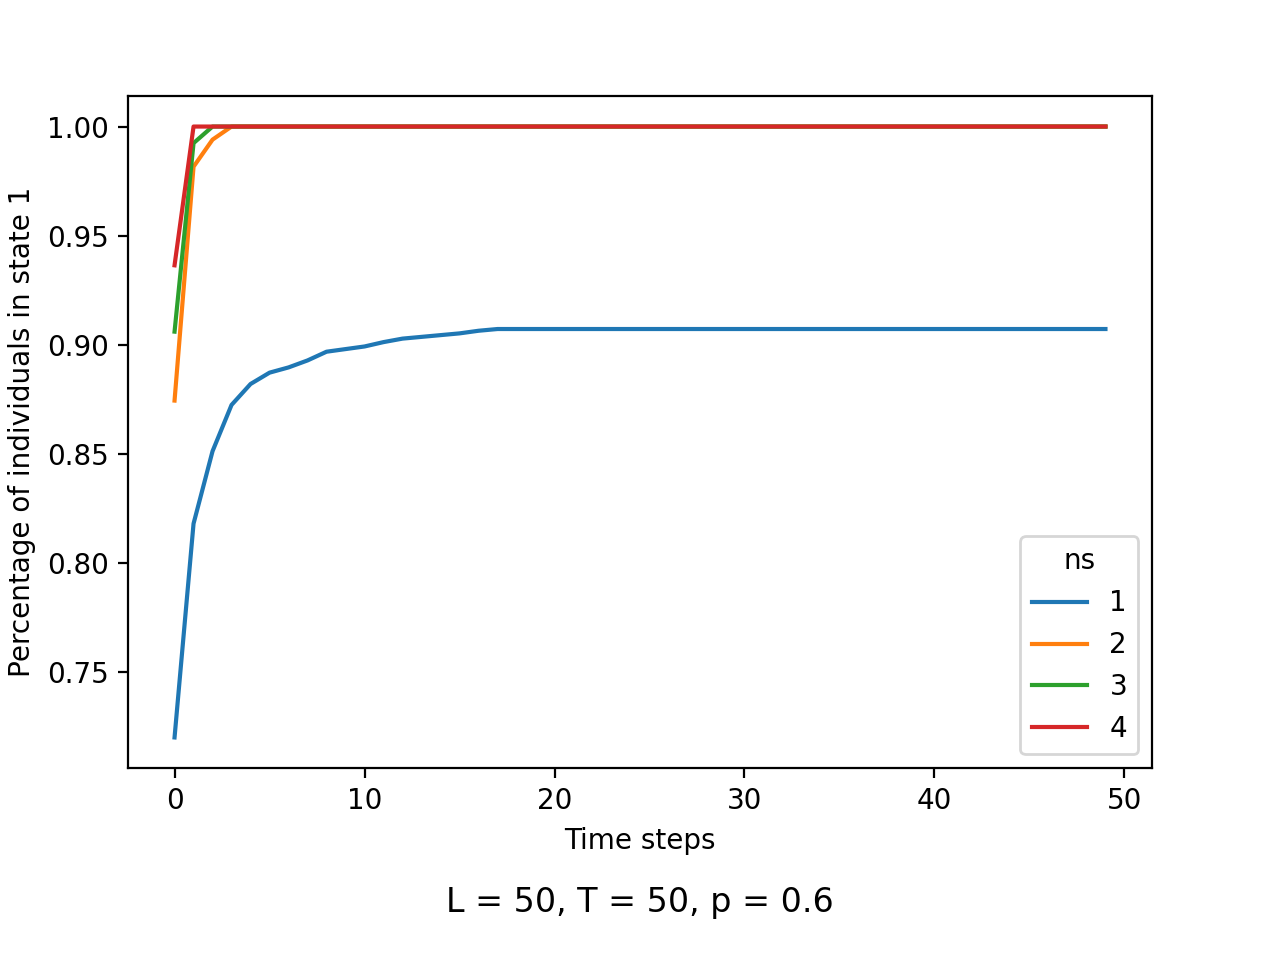

Text(0.5, 0.05, 'L = 50, T = 50, p = 0.6')

In [40]:



L = 50
T = 50
p = 0.6
ns = 2
x = np.empty([L, L])
x.fill(np.nan)

fig = plt.figure()

ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Percentage of individuals in state 1')

for ns in range(1,5):
    plt.plot(range(0,T),voter(x,L,p,T,ns)[0],label = ns)

plt.legend(title = 'ns')
#voter(x,L,p,T,ns)

txt="L = " + str(L) + ", T = " + str(T) + ", p = " + str(p) 
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)


<IPython.core.display.Javascript object>


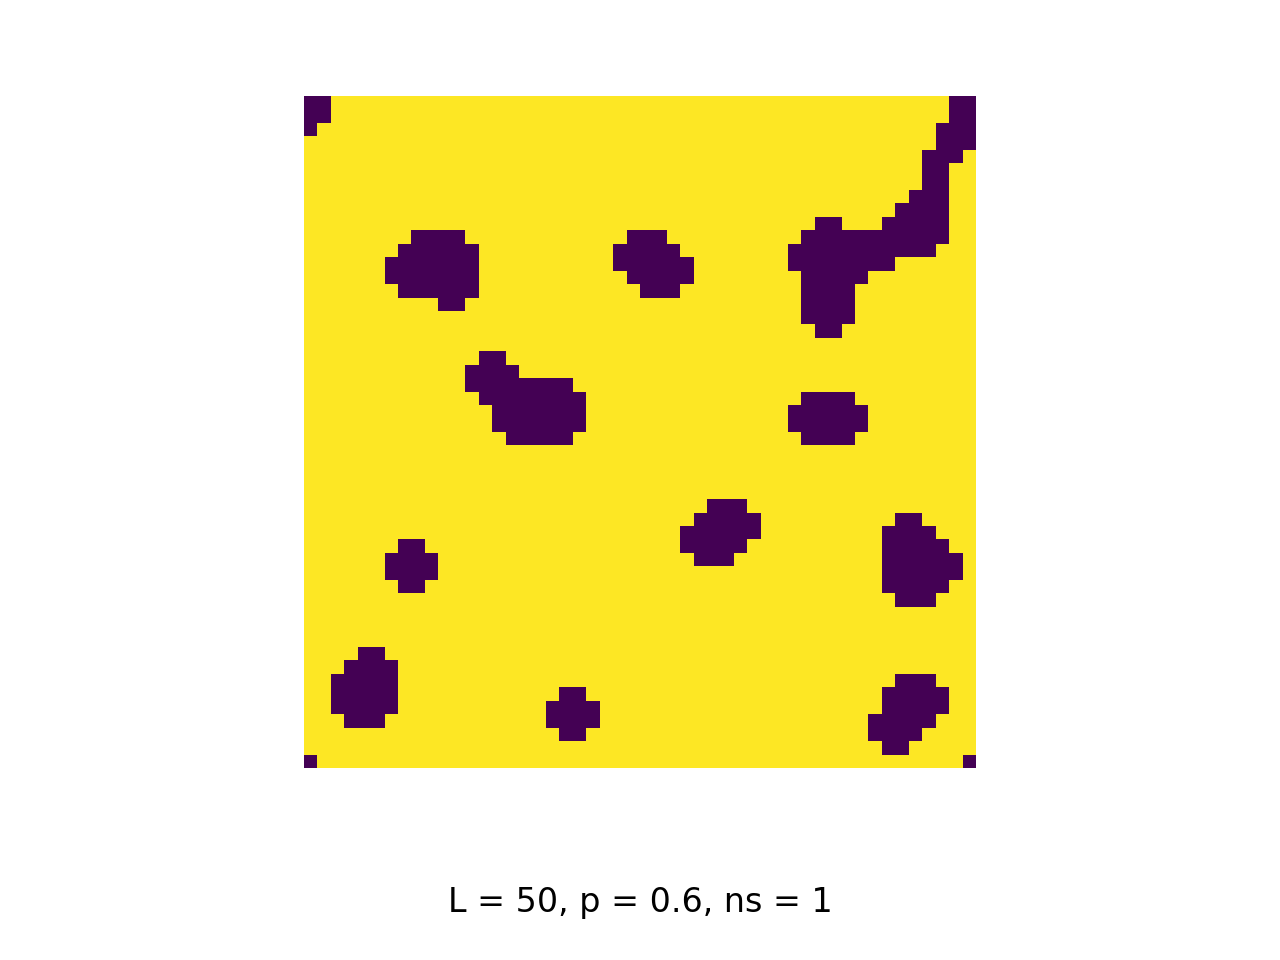

In [43]:
#trying animation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

%matplotlib notebook

L = 50 #size of world
ns = 1 #neighborhood size

p = 0.6
x = np.empty([L, L])
x.fill(np.nan)
temp = np.random.random(size=(L, L))
for i in range(L):
    for j in range(L):
        if temp[i,j] <= p:
            x[i,j] = 1
        else:
            x[i,j] = 0
def voter_one_sim(x,L,ns):
    """function that returns the array after each simulation"""
    y = np.zeros([L, L])
    
    
    for sims in range(1):
        
        count = 0
        for i in range(L):
            for j in range(L):
                neighborhood = 0
                if i >= L-ns: 
                    i = -(L-i)
                if j >= L-ns:
                    j = -(L-j)
                for dx in range(-ns,ns+1,1):
                    for dy in range(-ns,ns+1,1):
                        #print(x[i+dx,j+dy])
                        neighborhood = neighborhood + x[i+dx,j+dy]
                #determinig majority
                if neighborhood>((2*ns+1)**2)/2:
                    y[i,j] = 1
                    count = count+1
                else:
                    y[i,j] = 0
        x=y
           
        
    #print(y)
    
    
    return(x)
plt.close ('all') # closes all figures
fig = plt.figure() #figsize=(25/3, 6.25)
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(x)#, interpolation='nearest')

txt="L = " + str(L) +  ", p = " + str(p) + ", ns = " + str(ns) 
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = voter_one_sim(animate.X,L,ns)
    return im
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = x

# Interval between frames (ms).
interval = 10
anim = animation.FuncAnimation(fig, animate, interval=interval, frames=200)
#anim.save('voter.mp4',
#          writer = 'ffmpeg', fps = 30)
plt.show()
